# Attendance Forecast

## Imports and Dependencies

In [580]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load and Merge Data

In [581]:
data_dir = "../data"

attendance_file = "attendance.csv"
entity_file = "entity_schedule.csv"
link_attraction_file = "link_attraction_park.csv"
parade_file = "parade_night_show.xlsx"
waiting_file = "waiting_times.csv"
weather_file = "weather_data.csv"

In [582]:
attendance = pd.read_csv(os.path.join(data_dir, attendance_file))
closing = pd.read_csv(os.path.join(data_dir, entity_file))
link_attraction = pd.read_csv(os.path.join(data_dir, link_attraction_file), sep=";")
parade = pd.read_excel(os.path.join(data_dir, parade_file))
waiting = pd.read_csv(os.path.join(data_dir, waiting_file))
weather = pd.read_csv(os.path.join(data_dir, weather_file))

### 1.1 Attendance

In [583]:
attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [584]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USAGE_DATE     2367 non-null   object
 1   FACILITY_NAME  2367 non-null   object
 2   attendance     2367 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.6+ KB


In [585]:
attendance["FACILITY_NAME"].unique()

array(['PortAventura World', 'Tivoli Gardens'], dtype=object)

In [586]:
attendance["USAGE_DATE"] = pd.to_datetime(attendance["USAGE_DATE"], format="%Y-%m-%d")
attendance = attendance[attendance["FACILITY_NAME"] == "PortAventura World"]
attendance.drop(columns=["FACILITY_NAME"], inplace=True)
attendance

,USAGE_DATE,attendance
0,2018-06-01,46804
2,2018-06-02,57940
4,2018-06-03,44365
6,2018-06-04,37617
8,2018-06-05,32438
...,...,...
2357,2022-07-22,49586
2359,2022-07-23,51748
2361,2022-07-24,45261
2363,2022-07-25,53764


### 1.2 Attraction Park Mapping

In [587]:
link_attraction.head()

,ATTRACTION,PARK
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens


In [588]:
link_attraction["PARK"].unique()

array(['Tivoli Gardens', 'PortAventura World'], dtype=object)

### 1.3 Closing

In [589]:
closing.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29


In [590]:
closing = closing[closing["ENTITY_DESCRIPTION_SHORT"] != "Tivoli Gardens"]

In [591]:
closing = closing.merge(
    link_attraction,
    how="left",
    left_on="ENTITY_DESCRIPTION_SHORT",
    right_on="ATTRACTION",
).drop(columns=["ATTRACTION"])
closing

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,PARK
0,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07,PortAventura World
1,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28,Tivoli Gardens
2,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11,Tivoli Gardens
3,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29,Tivoli Gardens
4,Fermeture Réhab,Top Spin,ATTR,2019-04-07 23:59:00.000,2019-04-07 23:59:00.000,2019-04-08 07:40:04.000,2019-04-07,Tivoli Gardens
...,...,...,...,...,...,...,...,...
36438,NaN,Log Flume,ATTR,2022-08-20 08:25:00.000,2022-08-20 23:09:00.000,2022-08-21 09:16:50.000,2022-08-20,Tivoli Gardens
36439,Fermeture Réhab,Giga Coaster,ATTR,2022-08-20 23:59:00.000,2022-08-20 23:59:00.000,2022-08-21 09:16:53.000,2022-08-20,PortAventura World
36440,NaN,Inverted Coaster,ATTR,2022-08-20 09:30:00.000,2022-08-20 17:48:00.000,2022-08-21 09:16:55.000,2022-08-20,PortAventura World
36441,NaN,Inverted Coaster,ATTR,2022-08-22 09:20:00.000,2022-08-22 17:54:00.000,2022-08-23 09:02:42.000,2022-08-22,PortAventura World


In [592]:
closing = closing[closing["PARK"] != "Tivoli Gardens"]
closing.drop(columns=["PARK"], inplace=True)

C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\925142589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing.drop(columns=["PARK"], inplace=True)


In [593]:
closing.drop(columns=["UPDATE_TIME"], inplace=True)

closing["DEB_TIME"] = pd.to_datetime(closing["DEB_TIME"])
closing["FIN_TIME"] = pd.to_datetime(closing["FIN_TIME"])
closing["WORK_DATE"] = pd.to_datetime(closing["WORK_DATE"])

C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\4213642292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing.drop(columns=["UPDATE_TIME"], inplace=True)
C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\4213642292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing["DEB_TIME"] = pd.to_datetime(closing["DEB_TIME"])
C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\4213642292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [594]:
closing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25215 entries, 0 to 36442
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REF_CLOSING_DESCRIPTION   2769 non-null   object        
 1   ENTITY_DESCRIPTION_SHORT  25215 non-null  object        
 2   ENTITY_TYPE               25215 non-null  object        
 3   DEB_TIME                  25215 non-null  datetime64[ns]
 4   FIN_TIME                  25215 non-null  datetime64[ns]
 5   WORK_DATE                 25215 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 1.3+ MB


In [595]:
closing = closing[closing["ENTITY_TYPE"] == "PARK"]
closing

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,WORK_DATE
5,NaN,PortAventura World,PARK,2018-07-17 08:30:00,2018-07-17 09:30:00,2018-07-17
9,NaN,PortAventura World,PARK,2019-02-28 08:30:00,2019-02-28 09:30:00,2019-02-28
11,NaN,PortAventura World,PARK,2019-08-18 08:30:00,2019-08-18 09:30:00,2019-08-18
13,NaN,PortAventura World,PARK,2020-02-05 10:00:00,2020-02-05 19:00:00,2020-02-05
32,NaN,PortAventura World,PARK,2019-02-16 08:30:00,2019-02-16 09:30:00,2019-02-16
...,...,...,...,...,...,...
36351,NaN,PortAventura World,PARK,2022-08-19 08:30:00,2022-08-19 09:30:00,2022-08-19
36361,NaN,PortAventura World,PARK,2022-08-17 09:30:00,2022-08-17 23:00:00,2022-08-17
36379,NaN,PortAventura World,PARK,2022-08-17 08:30:00,2022-08-17 09:30:00,2022-08-17
36403,NaN,PortAventura World,PARK,2022-08-18 09:30:00,2022-08-18 23:00:00,2022-08-18


In [596]:
closing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1864 entries, 5 to 36425
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   REF_CLOSING_DESCRIPTION   0 non-null      object        
 1   ENTITY_DESCRIPTION_SHORT  1864 non-null   object        
 2   ENTITY_TYPE               1864 non-null   object        
 3   DEB_TIME                  1864 non-null   datetime64[ns]
 4   FIN_TIME                  1864 non-null   datetime64[ns]
 5   WORK_DATE                 1864 non-null   datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 101.9+ KB


In [597]:
closing.sort_values(by="WORK_DATE")

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,WORK_DATE
9194,NaN,PortAventura World,PARK,2018-01-01 10:00:00,2018-01-01 22:00:00,2018-01-01
9584,NaN,PortAventura World,PARK,2018-01-01 08:30:00,2018-01-01 09:30:00,2018-01-01
8777,NaN,PortAventura World,PARK,2018-01-02 09:00:00,2018-01-02 22:00:00,2018-01-02
10065,NaN,PortAventura World,PARK,2018-01-02 08:00:00,2018-01-02 09:00:00,2018-01-02
23702,NaN,PortAventura World,PARK,2018-01-03 09:00:00,2018-01-03 22:00:00,2018-01-03
...,...,...,...,...,...,...
36336,NaN,PortAventura World,PARK,2022-08-20 09:30:00,2022-08-20 23:00:00,2022-08-20
36240,NaN,PortAventura World,PARK,2022-08-21 09:30:00,2022-08-21 23:00:00,2022-08-21
22559,NaN,PortAventura World,PARK,2022-08-21 08:30:00,2022-08-21 09:30:00,2022-08-21
36217,NaN,PortAventura World,PARK,2022-08-22 09:30:00,2022-08-22 23:00:00,2022-08-22


In [598]:
# # Count the frequency of rows for each date
# date_counts = closing["WORK_DATE"].value_counts().sort_index()

# # Plot the frequency
# plt.figure(figsize=(12, 6))
# date_counts.plot(kind="bar", width=0.8, alpha=0.75, edgecolor="black")
# plt.title("Frequency of Rows by WORK_DATE", fontsize=16)
# plt.xlabel("Usage Date", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# plt.xticks(rotation=45, fontsize=10)
# plt.grid(axis="y", linestyle="--", alpha=0.7)
# plt.tight_layout()
# plt.show()

In [599]:
closing["time_closed"] = (
    closing["FIN_TIME"] - closing["DEB_TIME"]
).dt.total_seconds() / 3600
closing

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,WORK_DATE,time_closed
5,NaN,PortAventura World,PARK,2018-07-17 08:30:00,2018-07-17 09:30:00,2018-07-17,1.0
9,NaN,PortAventura World,PARK,2019-02-28 08:30:00,2019-02-28 09:30:00,2019-02-28,1.0
11,NaN,PortAventura World,PARK,2019-08-18 08:30:00,2019-08-18 09:30:00,2019-08-18,1.0
13,NaN,PortAventura World,PARK,2020-02-05 10:00:00,2020-02-05 19:00:00,2020-02-05,9.0
32,NaN,PortAventura World,PARK,2019-02-16 08:30:00,2019-02-16 09:30:00,2019-02-16,1.0
...,...,...,...,...,...,...,...
36351,NaN,PortAventura World,PARK,2022-08-19 08:30:00,2022-08-19 09:30:00,2022-08-19,1.0
36361,NaN,PortAventura World,PARK,2022-08-17 09:30:00,2022-08-17 23:00:00,2022-08-17,13.5
36379,NaN,PortAventura World,PARK,2022-08-17 08:30:00,2022-08-17 09:30:00,2022-08-17,1.0
36403,NaN,PortAventura World,PARK,2022-08-18 09:30:00,2022-08-18 23:00:00,2022-08-18,13.5


In [600]:
unique_closing = closing.groupby("WORK_DATE")["time_closed"].sum().reset_index()
unique_closing["min_DEB_TIME"] = (
    closing.groupby("WORK_DATE")["DEB_TIME"]
    .min()
    .reset_index(name="min_DEB_TIME")["min_DEB_TIME"]
)
unique_closing["max_FIN_TIME"] = (
    closing.groupby("WORK_DATE")["FIN_TIME"]
    .max()
    .reset_index(name="max_FIN_TIME")["max_FIN_TIME"]
)
unique_closing

,WORK_DATE,time_closed,min_DEB_TIME,max_FIN_TIME
0,2018-01-01,13.0,2018-01-01 08:30:00,2018-01-01 22:00:00
1,2018-01-02,14.0,2018-01-02 08:00:00,2018-01-02 22:00:00
2,2018-01-03,14.0,2018-01-03 08:00:00,2018-01-03 22:00:00
3,2018-01-04,14.0,2018-01-04 08:00:00,2018-01-04 22:00:00
4,2018-01-05,14.0,2018-01-05 08:00:00,2018-01-05 22:00:00
...,...,...,...,...
927,2022-08-18,14.5,2022-08-18 08:30:00,2022-08-18 23:00:00
928,2022-08-19,14.5,2022-08-19 08:30:00,2022-08-19 23:00:00
929,2022-08-20,14.5,2022-08-20 08:30:00,2022-08-20 23:00:00
930,2022-08-21,14.5,2022-08-21 08:30:00,2022-08-21 23:00:00


### 1.4 Merge Dataframes Attendance and Closing

In [601]:
df = attendance.merge(
    unique_closing, how="left", left_on="USAGE_DATE", right_on="WORK_DATE"
).drop(columns=["WORK_DATE"])
df

,USAGE_DATE,attendance,time_closed,min_DEB_TIME,max_FIN_TIME
0,2018-06-01,46804,14.0,2018-06-01 08:30:00,2018-06-01 23:00:00
1,2018-06-02,57940,14.0,2018-06-02 08:30:00,2018-06-02 23:00:00
2,2018-06-03,44365,14.0,2018-06-03 08:30:00,2018-06-03 23:00:00
3,2018-06-04,37617,14.0,2018-06-04 08:30:00,2018-06-04 23:00:00
4,2018-06-05,32438,14.0,2018-06-05 08:30:00,2018-06-05 23:00:00
...,...,...,...,...,...
1177,2022-07-22,49586,14.5,2022-07-22 08:30:00,2022-07-22 23:00:00
1178,2022-07-23,51748,14.5,2022-07-23 08:30:00,2022-07-23 23:00:00
1179,2022-07-24,45261,14.5,2022-07-24 08:30:00,2022-07-24 23:00:00
1180,2022-07-25,53764,14.5,2022-07-25 08:30:00,2022-07-25 23:00:00


In [602]:
df.loc[df["attendance"] < 0, "attendance"] = 0

In [603]:
df

,USAGE_DATE,attendance,time_closed,min_DEB_TIME,max_FIN_TIME
0,2018-06-01,46804,14.0,2018-06-01 08:30:00,2018-06-01 23:00:00
1,2018-06-02,57940,14.0,2018-06-02 08:30:00,2018-06-02 23:00:00
2,2018-06-03,44365,14.0,2018-06-03 08:30:00,2018-06-03 23:00:00
3,2018-06-04,37617,14.0,2018-06-04 08:30:00,2018-06-04 23:00:00
4,2018-06-05,32438,14.0,2018-06-05 08:30:00,2018-06-05 23:00:00
...,...,...,...,...,...
1177,2022-07-22,49586,14.5,2022-07-22 08:30:00,2022-07-22 23:00:00
1178,2022-07-23,51748,14.5,2022-07-23 08:30:00,2022-07-23 23:00:00
1179,2022-07-24,45261,14.5,2022-07-24 08:30:00,2022-07-24 23:00:00
1180,2022-07-25,53764,14.5,2022-07-25 08:30:00,2022-07-25 23:00:00


Remove COVID-19 period between 01/07/2020 and 30/06/2021

In [604]:
# Define the COVID-19 period to filter out
start_date = "2020-07-01"
end_date = "2021-06-30"

# Remove rows within the specified COVID-19 period
df = df[(df["USAGE_DATE"] < start_date) | (df["USAGE_DATE"] > end_date)]

In [605]:
df_post_covid = df[(df["USAGE_DATE"] > end_date)]
df_pre_covid = df[(df["USAGE_DATE"] < start_date)]

If we remove all closing times we only keep 289 rows. Also there seems to be a problem because when the park is closed there is still very high attendance. Thus, we choose to keep all rows and ignore the park's closing schedule.

In [606]:
df[df["min_DEB_TIME"].isna()]

,USAGE_DATE,attendance,time_closed,min_DEB_TIME,max_FIN_TIME
639,2020-03-01,33187,NaN,NaT,NaT
640,2020-03-02,28619,NaN,NaT,NaT
641,2020-03-03,30985,NaN,NaT,NaT
642,2020-03-04,27113,NaN,NaT,NaT
643,2020-03-05,22852,NaN,NaT,NaT
...,...,...,...,...,...
1062,2022-03-29,29361,NaN,NaT,NaT
1063,2022-03-30,31868,NaN,NaT,NaT
1064,2022-03-31,25984,NaN,NaT,NaT
1126,2022-06-01,47430,NaN,NaT,NaT


In [607]:
df.describe()

,USAGE_DATE,attendance,time_closed,min_DEB_TIME,max_FIN_TIME
count,1043,1043.000000,754.000000,754,754
mean,2020-04-29 16:38:11.850431488,38769.716203,12.569629,2019-10-07 00:54:52.042440448,2019-10-07 13:55:37.400530688
min,2018-06-01 00:00:00,4774.000000,9.000000,2018-06-01 08:30:00,2018-06-01 23:00:00
25%,2019-02-16 12:00:00,26206.000000,11.000000,2018-12-06 14:30:00,2018-12-07 01:00:00
50%,2019-11-04 00:00:00,39006.000000,13.000000,2019-06-12 20:30:00,2019-06-13 11:00:00
75%,2021-11-07 12:00:00,50885.500000,14.000000,2019-12-18 02:30:00,2019-12-18 12:15:00
max,2022-07-26 00:00:00,80642.000000,14.500000,2022-07-26 08:30:00,2022-07-26 23:00:00
std,NaN,15459.079075,1.767192,NaN,NaN


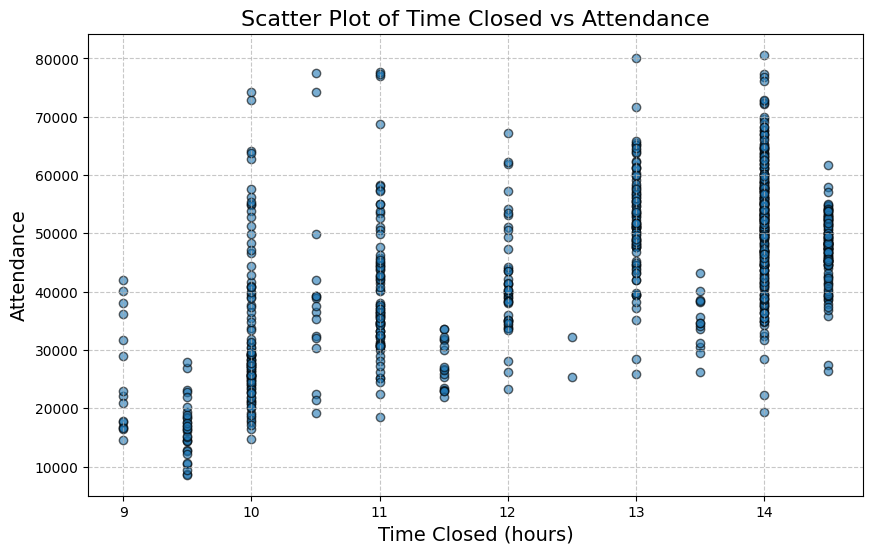

In [608]:
plt.figure(figsize=(10, 6))
plt.scatter(df["time_closed"], df["attendance"], alpha=0.6, edgecolor="k")
plt.title("Scatter Plot of Time Closed vs Attendance", fontsize=16)
plt.xlabel("Time Closed (hours)", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

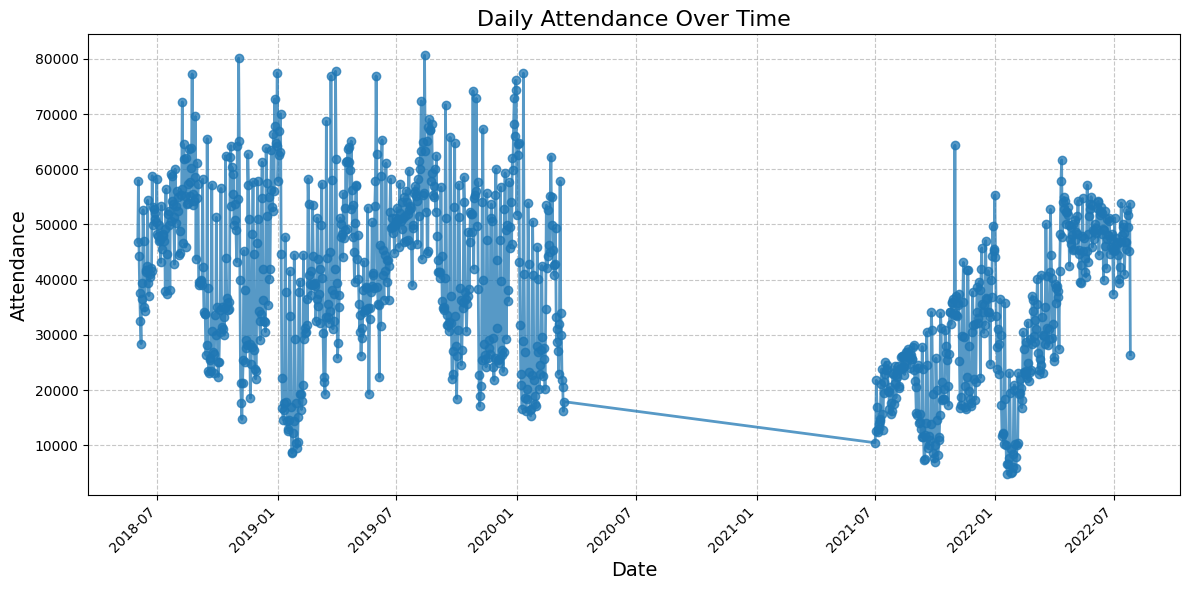

In [609]:
# Group data by USAGE_DATE and calculate daily attendance
daily_attendance = df.groupby("USAGE_DATE")["attendance"].sum()

# Plot daily attendance over time
plt.figure(figsize=(12, 6))
daily_attendance.plot(kind="line", marker="o", linewidth=2, alpha=0.75)
plt.title("Daily Attendance Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

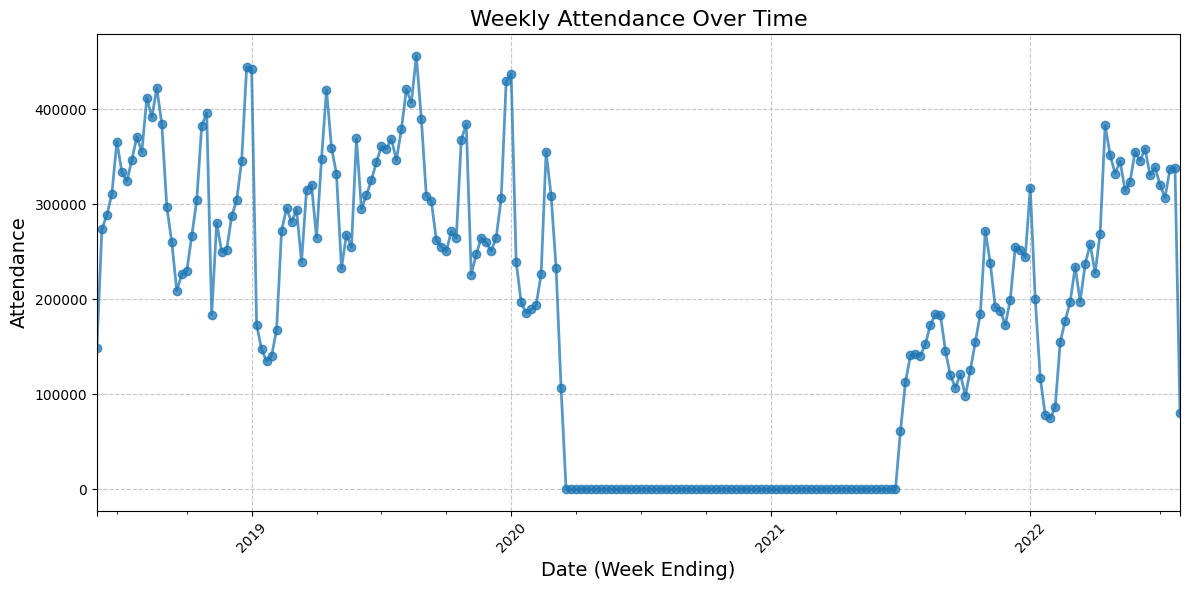

In [610]:
# Resample data by week and calculate weekly attendance sum
weekly_attendance = df.groupby(pd.Grouper(key="USAGE_DATE", freq="W"))[
    "attendance"
].sum()

# Plot weekly attendance over time
plt.figure(figsize=(12, 6))
weekly_attendance.plot(kind="line", marker="o", linewidth=2, alpha=0.75)
plt.title("Weekly Attendance Over Time", fontsize=16)
plt.xlabel("Date (Week Ending)", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\3524064143.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_attendance = df.groupby(pd.Grouper(key="USAGE_DATE", freq="m"))[


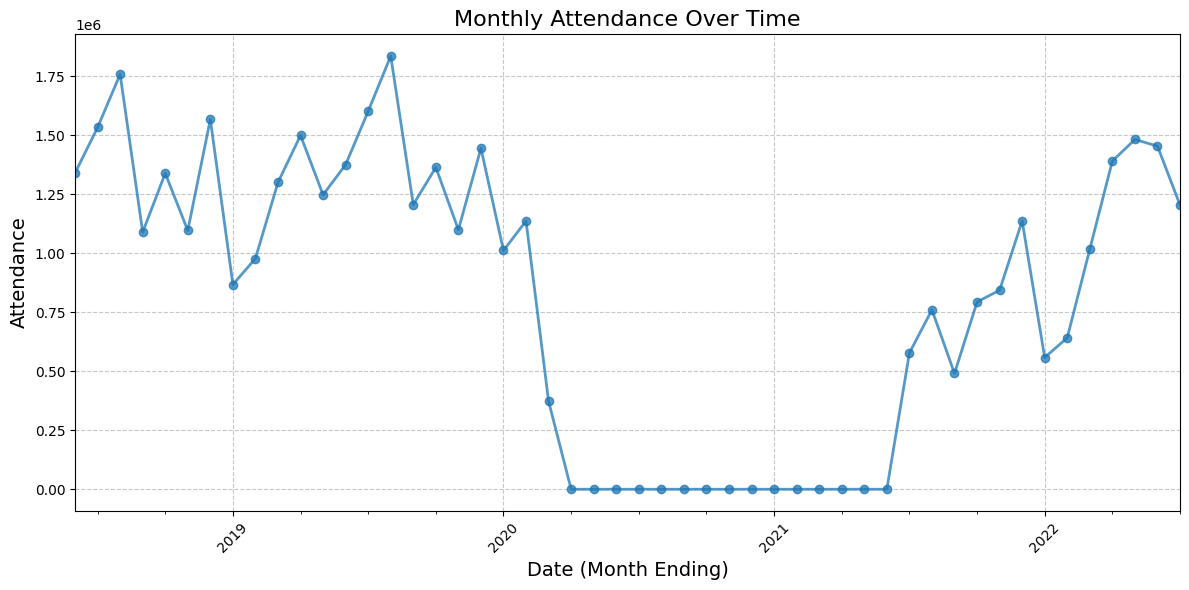

In [611]:
monthly_attendance = df.groupby(pd.Grouper(key="USAGE_DATE", freq="m"))[
    "attendance"
].sum()

# Plot weekly attendance over time
plt.figure(figsize=(12, 6))
monthly_attendance.plot(kind="line", marker="o", linewidth=2, alpha=0.75)
plt.title("Monthly Attendance Over Time", fontsize=16)
plt.xlabel("Date (Month Ending)", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\880622441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["USAGE_DATE"].dt.month
C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\880622441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["DayOfWeek"] = data["USAGE_DATE"].dt.day_name()
C:\Users\dorab\AppData\Local\Temp\ipykernel_12284\880622441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

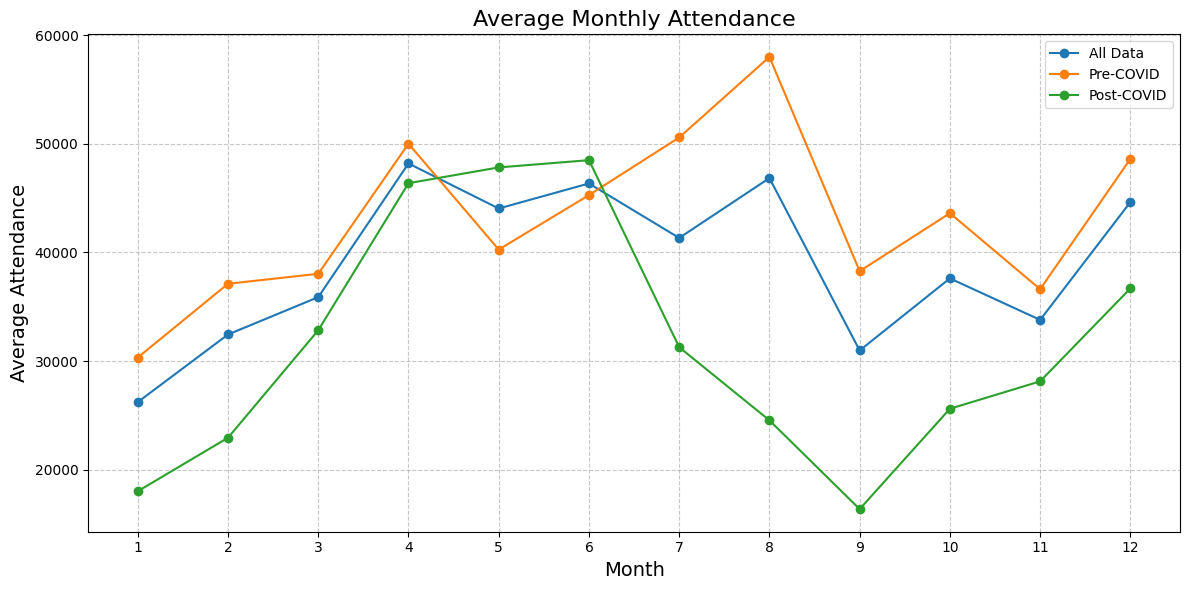

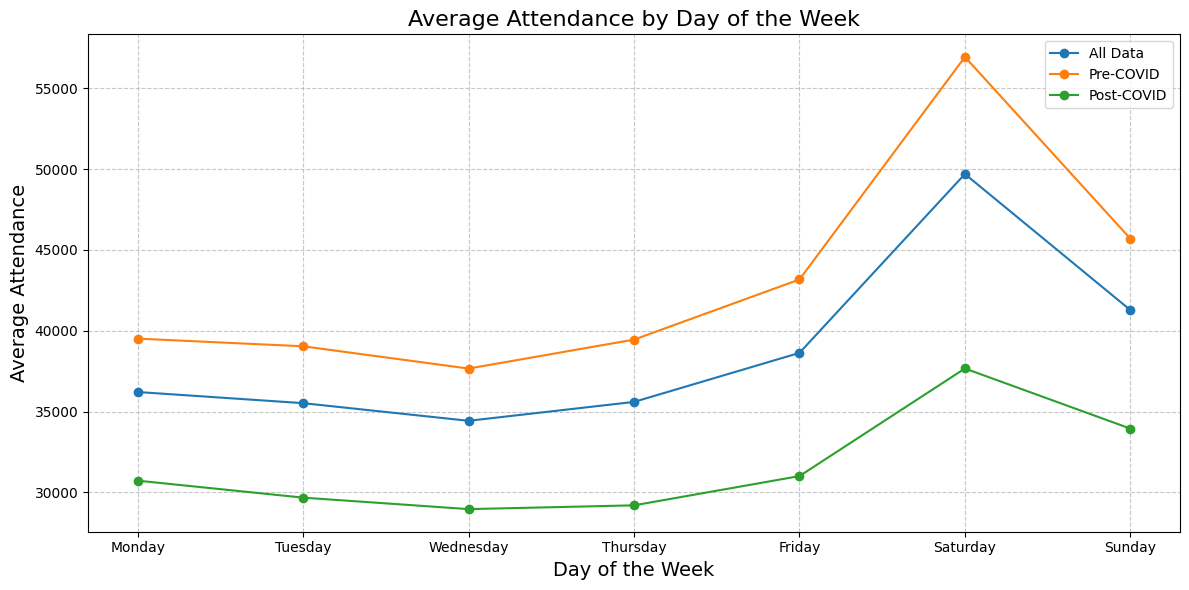

In [612]:
# Add columns for month and day of the week
for data in [df, df_pre_covid, df_post_covid]:
    data["Month"] = data["USAGE_DATE"].dt.month
    data["DayOfWeek"] = data["USAGE_DATE"].dt.day_name()

# Calculate average monthly attendance
avg_monthly_attendance = {
    "All Data": df.groupby("Month")["attendance"].mean(),
    "Pre-COVID": df_pre_covid.groupby("Month")["attendance"].mean(),
    "Post-COVID": df_post_covid.groupby("Month")["attendance"].mean(),
}

# Calculate average attendance by day of the week
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
avg_dayofweek_attendance = {
    label: series.groupby(series.index).mean().reindex(day_order)
    for label, series in {
        "All Data": df.groupby("DayOfWeek")["attendance"].mean(),
        "Pre-COVID": df_pre_covid.groupby("DayOfWeek")["attendance"].mean(),
        "Post-COVID": df_post_covid.groupby("DayOfWeek")["attendance"].mean(),
    }.items()
}

# Plot average monthly attendance
plt.figure(figsize=(12, 6))
for label, series in avg_monthly_attendance.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Monthly Attendance", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Attendance", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# Plot average attendance by day of the week
plt.figure(figsize=(12, 6))
for label, series in avg_dayofweek_attendance.items():
    plt.plot(series.index, series.values, marker="o", label=label)
plt.title("Average Attendance by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Average Attendance", fontsize=14)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [613]:
df

,USAGE_DATE,attendance,time_closed,min_DEB_TIME,max_FIN_TIME,Month,DayOfWeek
0,2018-06-01,46804,14.0,2018-06-01 08:30:00,2018-06-01 23:00:00,6,Friday
1,2018-06-02,57940,14.0,2018-06-02 08:30:00,2018-06-02 23:00:00,6,Saturday
2,2018-06-03,44365,14.0,2018-06-03 08:30:00,2018-06-03 23:00:00,6,Sunday
3,2018-06-04,37617,14.0,2018-06-04 08:30:00,2018-06-04 23:00:00,6,Monday
4,2018-06-05,32438,14.0,2018-06-05 08:30:00,2018-06-05 23:00:00,6,Tuesday
...,...,...,...,...,...,...,...
1177,2022-07-22,49586,14.5,2022-07-22 08:30:00,2022-07-22 23:00:00,7,Friday
1178,2022-07-23,51748,14.5,2022-07-23 08:30:00,2022-07-23 23:00:00,7,Saturday
1179,2022-07-24,45261,14.5,2022-07-24 08:30:00,2022-07-24 23:00:00,7,Sunday
1180,2022-07-25,53764,14.5,2022-07-25 08:30:00,2022-07-25 23:00:00,7,Monday


### 1.5 Merge Dataframes with Weather

In [614]:
weather.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,2.072640e+05,207264.000000,2.072640e+05,2.072640e+05,207264.000000,0.0,207264.000000,207264.000000,207264.000000,207264.000000,...,207264.000000,207264.000000,207264.000000,240.000000,28929.000000,27.000000,1153.000000,0.0,207264.000000,207264.000000
mean,1.288222e+09,5716.795970,4.887349e+01,2.295104e+00,11.889151,NaN,8.099663,10.580149,10.928969,12.922912,...,79.647778,3.605635,183.641076,3.706583,0.570994,1.153333,0.458725,NaN,65.141038,759.221582
std,2.153956e+08,1771.907295,2.842178e-14,8.881806e-16,7.173453,NaN,5.606324,8.350423,7.167604,7.210912,...,15.433862,1.771659,102.334575,2.148921,0.660715,1.040185,0.437237,NaN,37.679434,105.483772
min,9.151488e+08,3600.000000,4.887349e+01,2.295104e+00,-12.240000,NaN,-36.100000,-17.930000,-17.130000,-9.030000,...,2.000000,0.010000,0.000000,0.710000,0.100000,0.130000,0.100000,NaN,0.000000,500.000000
25%,1.101686e+09,3600.000000,4.887349e+01,2.295104e+00,6.720000,NaN,4.160000,4.190000,5.740000,7.640000,...,70.000000,2.270000,91.000000,1.995000,0.170000,0.310000,0.170000,NaN,31.000000,800.000000
50%,1.288222e+09,7200.000000,4.887349e+01,2.295104e+00,11.670000,NaN,8.450000,11.060000,10.710000,12.640000,...,84.000000,3.310000,203.000000,3.550000,0.320000,1.000000,0.300000,NaN,83.000000,803.000000
75%,1.474759e+09,7200.000000,4.887349e+01,2.295104e+00,16.830000,NaN,12.370000,16.580000,15.770000,17.900000,...,92.000000,4.630000,258.000000,4.790000,0.710000,1.500000,0.560000,NaN,100.000000,804.000000
max,1.661296e+09,7200.000000,4.887349e+01,2.295104e+00,41.260000,NaN,25.800000,43.560000,40.110000,43.400000,...,100.000000,18.110000,360.000000,10.750000,10.760000,3.190000,3.000000,NaN,100.000000,804.000000


In [615]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207264 entries, 0 to 207263
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   207264 non-null  int64  
 1   dt_iso               207264 non-null  object 
 2   timezone             207264 non-null  int64  
 3   city_name            207264 non-null  object 
 4   lat                  207264 non-null  float64
 5   lon                  207264 non-null  float64
 6   temp                 207264 non-null  float64
 7   visibility           0 non-null       float64
 8   dew_point            207264 non-null  float64
 9   feels_like           207264 non-null  float64
 10  temp_min             207264 non-null  float64
 11  temp_max             207264 non-null  float64
 12  pressure             207264 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

In [616]:
# Update the regex to extract everything before " +"
weather["dt_iso"] = weather["dt_iso"].str.extract(r"^(.*?) \+")[0]

# Convert `dt_iso` to datetime
weather["dt_iso"] = pd.to_datetime(weather["dt_iso"], format="%Y-%m-%d %H:%M:%S")

weather.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,915148800,1999-01-01 00:00:00,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,...,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,915152400,1999-01-01 01:00:00,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,...,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,915156000,1999-01-01 02:00:00,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,...,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,915159600,1999-01-01 03:00:00,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,...,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,915163200,1999-01-01 04:00:00,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n


In [617]:
!pip install vacances-scolaires-france


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [618]:
# Filter data between 08:00 and 18:00 for each day
filtered_weather = weather[
    (weather["dt_iso"].dt.hour >= 8) & (weather["dt_iso"].dt.hour <= 18)
]

# Group by date and calculate the average for each day
daily_avg = (
    filtered_weather.groupby(filtered_weather["dt_iso"].dt.date)
    .agg(
        {
            "dew_point": "mean",
            "feels_like": "mean",
            "rain_1h": "sum",
            "snow_1h": "sum",
            "clouds_all": "sum",
        }
    )
    .reset_index()
)

daily_avg["dt_iso"] = pd.to_datetime(daily_avg["dt_iso"])

daily_avg

,dt_iso,dew_point,feels_like,rain_1h,snow_1h,clouds_all
0,1999-01-01,6.240909,7.510000,0.00,0.0,572
1,1999-01-02,6.669091,5.119091,2.17,0.0,967
2,1999-01-03,5.945455,6.712727,5.56,0.0,886
3,1999-01-04,12.110000,12.952727,0.15,0.0,1100
4,1999-01-05,9.762727,11.880000,0.00,0.0,501
...,...,...,...,...,...,...
8631,2022-08-19,16.709091,22.328182,0.00,0.0,1028
8632,2022-08-20,14.417273,22.755455,0.00,0.0,203
8633,2022-08-21,14.171818,24.279091,0.00,0.0,913
8634,2022-08-22,16.477273,23.910000,0.00,0.0,758


In [619]:
df = df.merge(daily_avg, how="left", left_on="USAGE_DATE", right_on="dt_iso").drop(
    columns=["dt_iso"]
)
df

,USAGE_DATE,attendance,time_closed,min_DEB_TIME,max_FIN_TIME,Month,DayOfWeek,dew_point,feels_like,rain_1h,snow_1h,clouds_all
0,2018-06-01,46804,14.0,2018-06-01 08:30:00,2018-06-01 23:00:00,6,Friday,16.508182,19.351818,4.75,0.0,1100
1,2018-06-02,57940,14.0,2018-06-02 08:30:00,2018-06-02 23:00:00,6,Saturday,14.741818,21.957273,0.00,0.0,567
2,2018-06-03,44365,14.0,2018-06-03 08:30:00,2018-06-03 23:00:00,6,Sunday,15.361818,23.664545,0.00,0.0,652
3,2018-06-04,37617,14.0,2018-06-04 08:30:00,2018-06-04 23:00:00,6,Monday,15.750000,22.944545,0.00,0.0,847
4,2018-06-05,32438,14.0,2018-06-05 08:30:00,2018-06-05 23:00:00,6,Tuesday,15.866364,19.265455,2.90,0.0,1068
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2022-07-22,49586,14.5,2022-07-22 08:30:00,2022-07-22 23:00:00,7,Friday,18.963636,24.148182,2.71,0.0,1013
1039,2022-07-23,51748,14.5,2022-07-23 08:30:00,2022-07-23 23:00:00,7,Saturday,18.069091,25.129091,0.00,0.0,927
1040,2022-07-24,45261,14.5,2022-07-24 08:30:00,2022-07-24 23:00:00,7,Sunday,17.924545,30.450909,0.00,0.0,458
1041,2022-07-25,53764,14.5,2022-07-25 08:30:00,2022-07-25 23:00:00,7,Monday,16.362727,25.486364,0.00,0.0,806


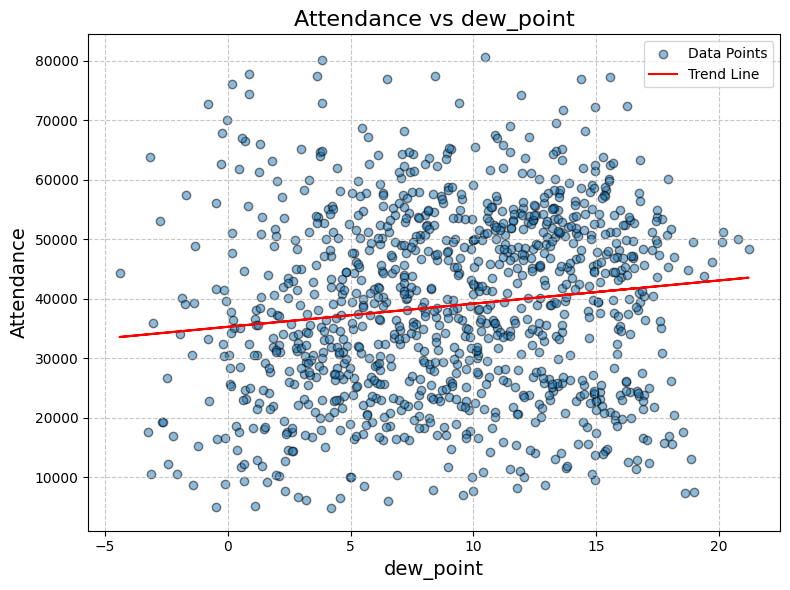

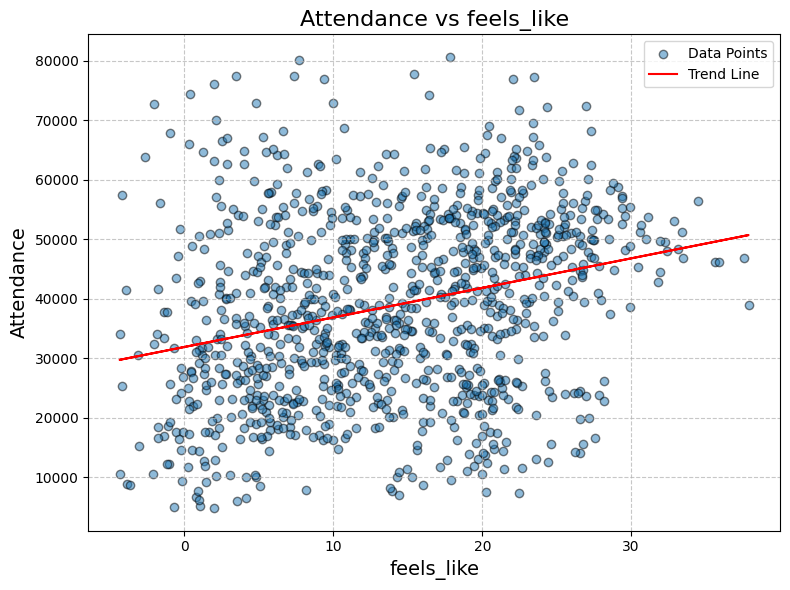

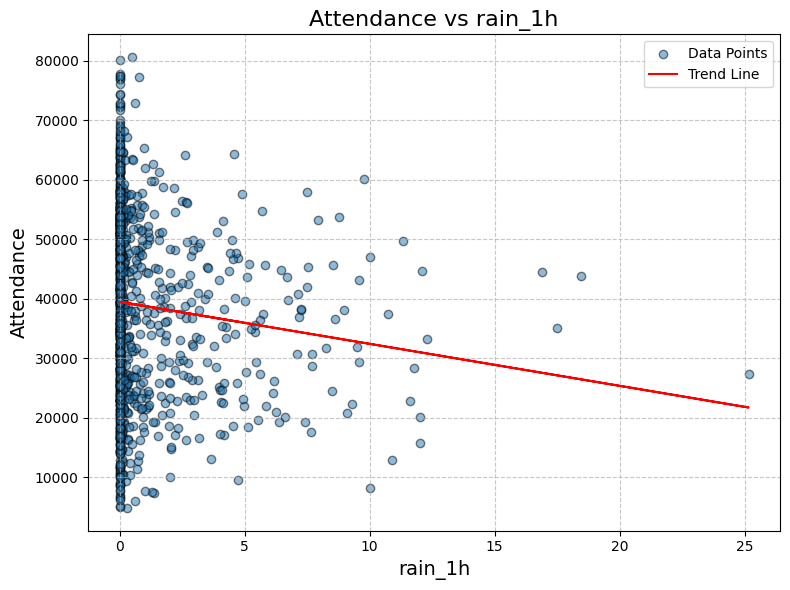

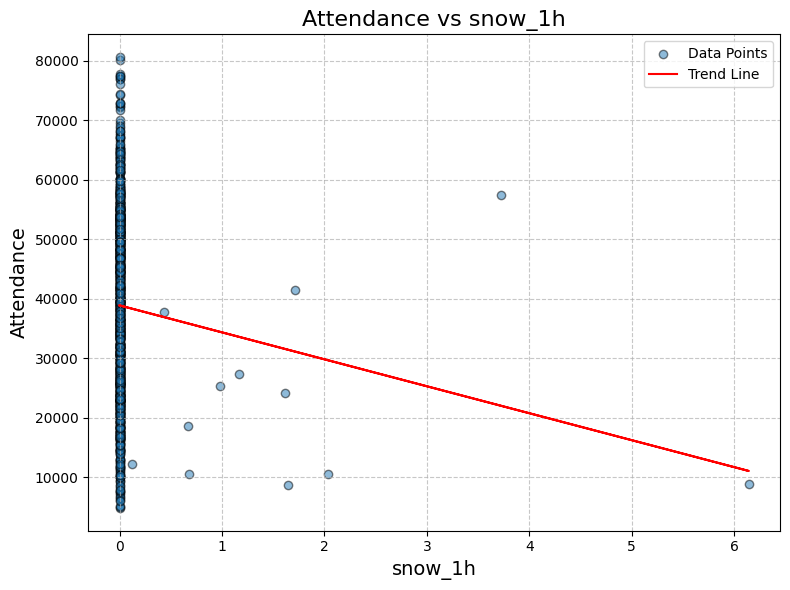

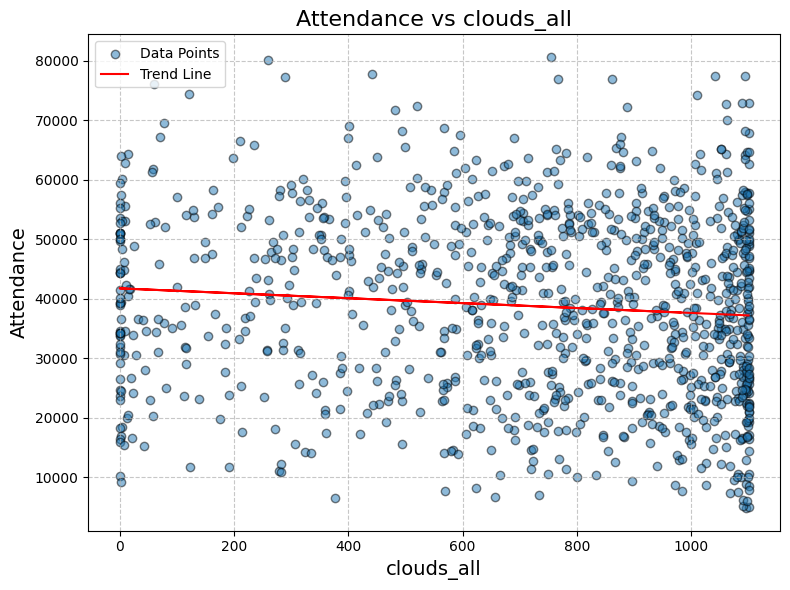

In [620]:
columns_to_plot = ["dew_point", "feels_like", "rain_1h", "snow_1h", "clouds_all"]

# Create scatter plots with a regression line for attendance vs each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(
        df[column], df["attendance"], alpha=0.5, edgecolor="k", label="Data Points"
    )

    # Regression line
    m, b = np.polyfit(df[column], df["attendance"], 1)
    plt.plot(df[column], m * df[column] + b, color="red", label="Trend Line")

    # Titles and labels
    plt.title(f"Attendance vs {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Attendance", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

Dew_point might not be the best predictor but the others look good.

## 2. Features

In [621]:
df = df.drop(columns=["time_closed", "min_DEB_TIME", "max_FIN_TIME"])

df

,USAGE_DATE,attendance,Month,DayOfWeek,dew_point,feels_like,rain_1h,snow_1h,clouds_all
0,2018-06-01,46804,6,Friday,16.508182,19.351818,4.75,0.0,1100
1,2018-06-02,57940,6,Saturday,14.741818,21.957273,0.00,0.0,567
2,2018-06-03,44365,6,Sunday,15.361818,23.664545,0.00,0.0,652
3,2018-06-04,37617,6,Monday,15.750000,22.944545,0.00,0.0,847
4,2018-06-05,32438,6,Tuesday,15.866364,19.265455,2.90,0.0,1068
...,...,...,...,...,...,...,...,...,...
1038,2022-07-22,49586,7,Friday,18.963636,24.148182,2.71,0.0,1013
1039,2022-07-23,51748,7,Saturday,18.069091,25.129091,0.00,0.0,927
1040,2022-07-24,45261,7,Sunday,17.924545,30.450909,0.00,0.0,458
1041,2022-07-25,53764,7,Monday,16.362727,25.486364,0.00,0.0,806


- Holiday feature

In [622]:
import holidays
from vacances_scolaires_france import SchoolHolidayDates


# Initialize France holidays (bank holidays)
fr_holidays = holidays.France(years=df["USAGE_DATE"].dt.year.unique())

# Dummy variable for bank holidays
df["Is_Bank_Holiday"] = df["USAGE_DATE"].apply(
    lambda x: True if x in fr_holidays else False
)

# Initialize the SchoolHolidayDates object
d = SchoolHolidayDates()


# Function to check if a date is a holiday
def is_school_holiday(date, zone="C"):
    return d.is_holiday_for_zone(date, zone)


# Add a new column indicating if the date is a school holiday
df["Is_School_Holiday"] = df["USAGE_DATE"].apply(lambda x: is_school_holiday(x.date()))

# Combine into a single dummy variable
df["Is_Holiday"] = (
    df[["Is_Bank_Holiday", "Is_School_Holiday"]].max(axis=1).astype("int")
)

df.drop(columns=["Is_Bank_Holiday", "Is_School_Holiday"], inplace=True)
df

,USAGE_DATE,attendance,Month,DayOfWeek,dew_point,feels_like,rain_1h,snow_1h,clouds_all,Is_Holiday
0,2018-06-01,46804,6,Friday,16.508182,19.351818,4.75,0.0,1100,0
1,2018-06-02,57940,6,Saturday,14.741818,21.957273,0.00,0.0,567,0
2,2018-06-03,44365,6,Sunday,15.361818,23.664545,0.00,0.0,652,0
3,2018-06-04,37617,6,Monday,15.750000,22.944545,0.00,0.0,847,0
4,2018-06-05,32438,6,Tuesday,15.866364,19.265455,2.90,0.0,1068,0
...,...,...,...,...,...,...,...,...,...,...
1038,2022-07-22,49586,7,Friday,18.963636,24.148182,2.71,0.0,1013,1
1039,2022-07-23,51748,7,Saturday,18.069091,25.129091,0.00,0.0,927,1
1040,2022-07-24,45261,7,Sunday,17.924545,30.450909,0.00,0.0,458,1
1041,2022-07-25,53764,7,Monday,16.362727,25.486364,0.00,0.0,806,1


<Figure size 800x600 with 0 Axes>

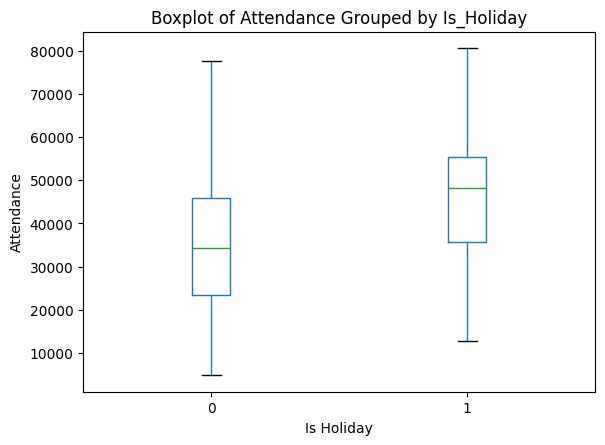

In [623]:
# Create a boxplot of attendance grouped by Is_Holiday
plt.figure(figsize=(8, 6))
df.boxplot(column="attendance", by="Is_Holiday", grid=False)
plt.title("Boxplot of Attendance Grouped by Is_Holiday")
plt.suptitle("")  # Remove the default subplot title
plt.xlabel("Is Holiday")
plt.ylabel("Attendance")
plt.show()

In [624]:
print(
    df.groupby("Is_Holiday")["attendance"].mean().reset_index(name="average_attendance")
)

   Is_Holiday  average_attendance
0           0        34680.831563
1           1        45786.838542


Attendance is clearly higher during holidays.

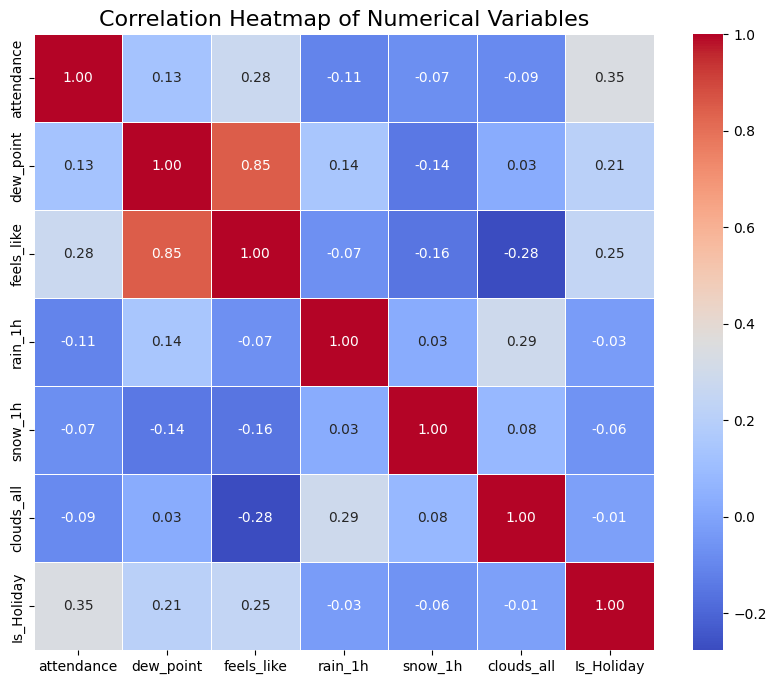

In [625]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical variables from the DataFrame
numerical_vars = df.select_dtypes(include=["float64", "int64"])

# Compute the correlation matrix
correlation_matrix = numerical_vars.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

- Remove dew_point

In [626]:
df.drop(columns=["dew_point"], inplace=True)

In [627]:
# Cyclical encoding for month and day of the week

# Month encoding (12 months in a year)
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

# Map days of the week to integers
day_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
}
df["DayOfWeek_int"] = df["DayOfWeek"].map(day_mapping)

# Day of the week encoding (7 days in a week)
df["DayOfWeek_sin"] = np.sin(2 * np.pi * df["DayOfWeek_int"] / 7)
df["DayOfWeek_cos"] = np.cos(2 * np.pi * df["DayOfWeek_int"] / 7)

# Drop intermediate columns if not needed
df.drop(columns=["DayOfWeek_int", "Month", "DayOfWeek"], inplace=True)
df

,USAGE_DATE,attendance,feels_like,rain_1h,snow_1h,clouds_all,Is_Holiday,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
0,2018-06-01,46804,19.351818,4.75,0.0,1100,0,1.224647e-16,-1.000000,-0.433884,-0.900969
1,2018-06-02,57940,21.957273,0.00,0.0,567,0,1.224647e-16,-1.000000,-0.974928,-0.222521
2,2018-06-03,44365,23.664545,0.00,0.0,652,0,1.224647e-16,-1.000000,-0.781831,0.623490
3,2018-06-04,37617,22.944545,0.00,0.0,847,0,1.224647e-16,-1.000000,0.000000,1.000000
4,2018-06-05,32438,19.265455,2.90,0.0,1068,0,1.224647e-16,-1.000000,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...
1038,2022-07-22,49586,24.148182,2.71,0.0,1013,1,-5.000000e-01,-0.866025,-0.433884,-0.900969
1039,2022-07-23,51748,25.129091,0.00,0.0,927,1,-5.000000e-01,-0.866025,-0.974928,-0.222521
1040,2022-07-24,45261,30.450909,0.00,0.0,458,1,-5.000000e-01,-0.866025,-0.781831,0.623490
1041,2022-07-25,53764,25.486364,0.00,0.0,806,1,-5.000000e-01,-0.866025,0.000000,1.000000


## 3. Forecasting

In [634]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

# Ensure data is sorted by time (necessary for time series models)
df = df.sort_values(
    by="USAGE_DATE"
)  # Replace 'Month' with a time-based column if available

# Assuming `df` is already loaded and cleaned
# Define features and target
X = df.drop(columns=["USAGE_DATE", "attendance"])
y = df["attendance"]

In [635]:
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Models to test
models = {
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR(C=1.0, kernel="rbf"),
}

# Metrics to track
results = {model_name: [] for model_name in models.keys()}

# Perform TimeSeriesSplit
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, model in models.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Store results
        results[model_name].append({"MAE": mae, "RMSE": rmse})

# Aggregate results
final_results = {}
for model_name, metrics in results.items():
    avg_mae = np.mean([m["MAE"] for m in metrics])
    avg_rmse = np.mean([m["RMSE"] for m in metrics])
    final_results[model_name] = {"Avg MAE": avg_mae, "Avg RMSE": avg_rmse}

In [638]:
final_results = pd.DataFrame(final_results)
final_results

,Ridge,Random Forest,SVM
Avg MAE,12425.586998,10854.731757,14234.315599
Avg RMSE,14898.136076,13400.089003,16486.815490
